In [34]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import tensorflow as tf
import hvplot.pandas
import matplotlib.pyplot as plt

In [35]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
productivity_df = pd.read_csv('Resources/Impact_of_Remote_Work_on_Mental_Health_Final.csv')

# Review the DataFrame
productivity_df.head()

,Employee_ID,Age,Gender,Job_Role,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Satisfaction_with_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Hybrid,47,7,Depression,No,Decrease,Unsatisfied,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,Remote,52,4,Anxiety,No,Increase,Satisfied,Weekly,Good,Asia
2,EMP0004,27,Male,Software Engineer,Onsite,32,8,Depression,Yes,Increase,Unsatisfied,NaN,Poor,Europe
3,EMP0005,49,Male,Sales,Onsite,35,12,NaN,Yes,Decrease,Unsatisfied,Weekly,Average,North America
4,EMP0006,59,Non-binary,Sales,Hybrid,39,3,NaN,No,Increase,Unsatisfied,NaN,Average,South America


In [36]:
productivity_df.columns

Index(['Employee_ID', 'Age', 'Gender', 'Job_Role', 'Work_Location',
       'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings',
       'Mental_Health_Condition', 'Access_to_Mental_Health_Resources',
       'Productivity_Change', 'Satisfaction_with_Remote_Work',
       'Physical_Activity', 'Sleep_Quality', 'Region'],
      dtype='object')

In [37]:
# Split and preprocess data into our features and target arrays
y = pd.get_dummies(productivity_df.Productivity_Change,dtype='int')['Increase']
X = pd.get_dummies(productivity_df.drop([
    'Employee_ID',
    'Productivity_Change', 
    'Satisfaction_with_Remote_Work'
    #'Age',
    #'Hours_Worked_Per_Week',
    #'Number_of_Virtual_Meetings'
    ], axis=1),dtype='int')

In [38]:
#Counting the number of data points for the target variable productivity
len(y)

2235

In [39]:
#counting the number of rows for the feature variables
len(X)

2235

In [40]:
#number fo unique values for each feature variable
X.nunique()

Age                                      39
Hours_Worked_Per_Week                    41
Number_of_Virtual_Meetings               16
Gender_Female                             2
Gender_Male                               2
Gender_Non-binary                         2
Gender_Prefer not to say                  2
Job_Role_Data Scientist                   2
Job_Role_Designer                         2
Job_Role_HR                               2
Job_Role_Marketing                        2
Job_Role_Project Manager                  2
Job_Role_Sales                            2
Job_Role_Software Engineer                2
Work_Location_Hybrid                      2
Work_Location_Onsite                      2
Work_Location_Remote                      2
Mental_Health_Condition_Anxiety           2
Mental_Health_Condition_Burnout           2
Mental_Health_Condition_Depression        2
Access_to_Mental_Health_Resources_No      2
Access_to_Mental_Health_Resources_Yes     2
Physical_Activity_Daily         

In [41]:
# Create the bins in which Data will be held
# Bins are 20, 30, 40, 50, 60, 70.   
#bins = [20, 30, 40, 50, 60, 70]

# Create the names for the five bins
#group_names = ["1", "2", "3", "4", "5"]



# Slice the data and place it into bins
#productivity_df["Age Range"] = pd.cut(productivity_df["Age"], 
#                                              bins, labels=group_names, 
#                                              include_lowest=True)
#productivity_df

In [42]:
# For now,  not proceeding with binning for the above columns as the distribution seems to be equal..will 
# look into a different ways of binning after running model so not creating "other" catoegory for the above.


In [43]:
X.columns

Index(['Age', 'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings',
       'Gender_Female', 'Gender_Male', 'Gender_Non-binary',
       'Gender_Prefer not to say', 'Job_Role_Data Scientist',
       'Job_Role_Designer', 'Job_Role_HR', 'Job_Role_Marketing',
       'Job_Role_Project Manager', 'Job_Role_Sales',
       'Job_Role_Software Engineer', 'Work_Location_Hybrid',
       'Work_Location_Onsite', 'Work_Location_Remote',
       'Mental_Health_Condition_Anxiety', 'Mental_Health_Condition_Burnout',
       'Mental_Health_Condition_Depression',
       'Access_to_Mental_Health_Resources_No',
       'Access_to_Mental_Health_Resources_Yes', 'Physical_Activity_Daily',
       'Physical_Activity_Weekly', 'Sleep_Quality_Average',
       'Sleep_Quality_Good', 'Sleep_Quality_Poor', 'Region_Africa',
       'Region_Asia', 'Region_Europe', 'Region_North America',
       'Region_Oceania', 'Region_South America'],
      dtype='object')

In [44]:
y.value_counts()

Increase
0    1195
1    1040
Name: count, dtype: int64

In [45]:
X.head()

,Age,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Gender_Female,Gender_Male,Gender_Non-binary,Gender_Prefer not to say,Job_Role_Data Scientist,Job_Role_Designer,Job_Role_HR,...,Physical_Activity_Weekly,Sleep_Quality_Average,Sleep_Quality_Good,Sleep_Quality_Poor,Region_Africa,Region_Asia,Region_Europe,Region_North America,Region_Oceania,Region_South America
0,32,47,7,0,0,1,0,0,0,1,...,1,0,1,0,0,0,1,0,0,0
1,40,52,4,1,0,0,0,1,0,0,...,1,0,1,0,0,1,0,0,0,0
2,27,32,8,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,49,35,12,0,1,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
4,59,39,3,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [46]:

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [47]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [48]:
from sklearn.decomposition import PCA
#Apply PCA
pca = PCA(n_components=20)
pca.fit_transform(X_train_scaled)


array([[ 0.85112846, -0.38930906,  1.45160542, ...,  0.83461801,
        -0.68821788,  0.21616686],
       [ 1.79346338, -0.06700471, -0.88986902, ...,  0.50322663,
         0.42356645, -0.61157975],
       [ 1.46888581,  1.43470152,  1.10119814, ...,  1.16856252,
        -1.19817655,  0.43757427],
       ...,
       [-0.73834647,  1.80120358,  0.52181083, ...,  0.33884816,
        -0.70285886, -0.12837219],
       [ 1.98699279,  0.39937655, -0.54706908, ...,  0.56805666,
         0.68047752, -0.26508364],
       [ 2.0858975 ,  1.65829807,  0.34268761, ..., -0.07656334,
         0.66631761, -1.31511053]])

In [49]:
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each component:", explained_variance)
print("Total explained variance:", sum(explained_variance))

Explained variance by each component: [0.06160571 0.05131333 0.04849841 0.04707063 0.0461547  0.04561602
 0.0422551  0.04187104 0.04069299 0.03941136 0.03843106 0.03779877
 0.03744785 0.03730833 0.03637778 0.03608873 0.03506317 0.03457872
 0.03374559 0.03322603]
Total explained variance: 0.8245552956104228


In [68]:
# Define the model - deep neural net
number_input_features = X_train.shape[1]
hidden_nodes_layer1 =  40
hidden_nodes_layer2 = 40
hidden_nodes_layer3 = 20

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 40)             │         1,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 20)             │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,841 (15.00 KB)

 Trainable params: 3,841 (15.00 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model

nn_hist = nn.fit(X_train_scaled, y_train, epochs=30, validation_split=0.2)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.4949 - loss: 0.7074 - val_accuracy: 0.5536 - val_loss: 0.6903
Epoch 2/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5510 - loss: 0.6847 - val_accuracy: 0.5536 - val_loss: 0.6935
Epoch 3/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5876 - loss: 0.6724 - val_accuracy: 0.5357 - val_loss: 0.6958
Epoch 4/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6301 - loss: 0.6546 - val_accuracy: 0.5387 - val_loss: 0.6956
Epoch 5/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6304 - loss: 0.6509 - val_accuracy: 0.5357 - val_loss: 0.7013
Epoch 6/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6419 - loss: 0.6384 - val_accuracy: 0.5179 - val_loss: 0.7065
Epoch 7/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6508 - loss: 0.6392 - val_accuracy: 0.5298 - val_loss: 0.7099
Epoch 8/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6675 - loss: 0.6303 - val_accuracy: 0.5208 - val_loss

In [52]:
# Save the model
nn.save("productivity_1.h5")

<Axes: >

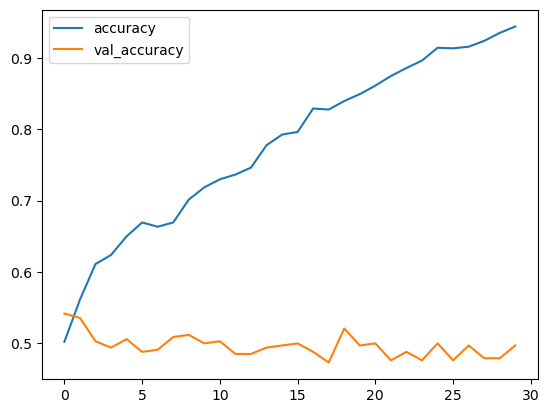

In [53]:
pd.DataFrame(nn_hist.history)[['accuracy','val_accuracy']].plot()

In [54]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

18/18 - 0s - 2ms/step - accuracy: 0.4812 - loss: 1.2836
Loss: 1.2835813760757446, Accuracy: 0.4812164604663849


In [55]:
ypred = nn.predict(X_test_scaled)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [56]:
ypred

array([[1.37024112e-02],
       [1.56820282e-01],
       [1.42829761e-01],
       [7.82034248e-02],
       [8.31364155e-01],
       [2.91417748e-01],
       [3.70764345e-01],
       [9.63705182e-01],
       [9.95388746e-01],
       [5.19984923e-02],
       [7.90394768e-02],
       [8.27812076e-01],
       [9.93737817e-01],
       [7.42287189e-02],
       [9.99441028e-01],
       [2.28422950e-03],
       [9.96601641e-01],
       [8.38761806e-01],
       [1.25349030e-01],
       [2.73973048e-01],
       [7.75305867e-01],
       [2.36153394e-01],
       [1.66025594e-01],
       [5.13114855e-02],
       [8.15549046e-02],
       [9.57826376e-01],
       [7.34104574e-01],
       [6.73920870e-01],
       [3.40118706e-01],
       [7.93268979e-02],
       [4.54218179e-01],
       [8.09996963e-01],
       [2.72616655e-01],
       [8.44949186e-01],
       [1.09703027e-01],
       [2.67877653e-02],
       [5.05313694e-01],
       [3.83711845e-01],
       [2.75691580e-02],
       [8.46291244e-01],


In [57]:
len(ypred)

559

In [58]:
pred=[]
for x in ypred:
    pred.append(x[0])

In [59]:
pred

[0.013702411,
 0.15682028,
 0.14282976,
 0.078203425,
 0.83136415,
 0.29141775,
 0.37076434,
 0.9637052,
 0.99538875,
 0.051998492,
 0.07903948,
 0.8278121,
 0.9937378,
 0.07422872,
 0.999441,
 0.0022842295,
 0.99660164,
 0.8387618,
 0.12534903,
 0.27397305,
 0.77530587,
 0.2361534,
 0.1660256,
 0.051311485,
 0.081554905,
 0.9578264,
 0.7341046,
 0.67392087,
 0.3401187,
 0.0793269,
 0.45421818,
 0.80999696,
 0.27261665,
 0.8449492,
 0.10970303,
 0.026787765,
 0.5053137,
 0.38371184,
 0.027569158,
 0.84629124,
 0.42521828,
 0.4803154,
 0.9866567,
 0.98301727,
 0.80114466,
 0.7872791,
 0.2579029,
 0.19497775,
 0.9174484,
 0.9672072,
 0.10339482,
 0.3880038,
 0.8673072,
 0.59396446,
 0.19917676,
 0.0012678294,
 0.07203983,
 0.0020079978,
 0.09329993,
 0.24444444,
 0.05950887,
 0.65882266,
 0.58861625,
 0.5025387,
 0.03902803,
 0.15330425,
 0.20597938,
 0.74167097,
 0.5748929,
 0.7818026,
 0.71364045,
 0.54666233,
 0.27259755,
 0.28561085,
 0.08096028,
 0.4686481,
 0.24325106,
 0.24034053,

In [60]:

pred_values = [round(x) for x in pred]
print(pred_values)


[0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 

In [61]:
pred_fit =pd.DataFrame({'actual':y_test,'Predict':pred_values})
pred_fit


,actual,Predict
370,0,0
1681,0,0
272,0,0
1163,0,0
684,1,1
...,...,...
1374,1,1
2009,0,0
1750,1,0
430,0,0


In [62]:
pred_subset = pred_fit.iloc[0:100]
pred_subset

,actual,Predict
370,0,0
1681,0,0
272,0,0
1163,0,0
684,1,1
...,...,...
1184,0,1
1156,1,0
835,1,1
581,0,0


In [63]:
# # Plotting the actual vs predicted values
line_plot = pred_subset.hvplot.line(
    x='index',
    y=['actual', 'Predict'],
    title='Actual vs Predicted Values',
    xlabel='Index',
    ylabel='Outcome',
    color=['blue', 'red']
)

line_plot


:NdOverlay   [Variable]
   :Curve   [index]   (value)

Text(0, 0.5, 'Predicted Values')

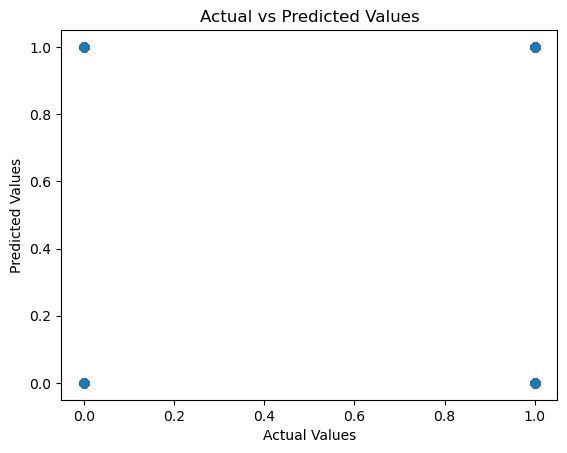

In [64]:
plt.scatter(y_test, pred_values)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

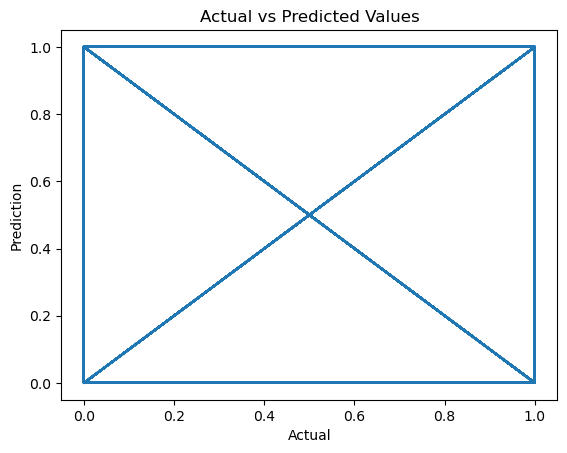

In [65]:
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.title("Actual vs Predicted Values")

# Have to plot our chart once again as it doesn't stick after being shown
plt.plot(pred_values,y_test)
plt.show()